<a href="https://colab.research.google.com/github/IvaroEkel/AI-Spielplatz/blob/main/notebooks/iris_dtree_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision tree classifier on Iris data

Based on
https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb

In [1]:
# Python ≥3.5 is required
import sys

assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
import seaborn as sns


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Font sizes
SIZE_SMALL = 18  # 14
SIZE_MEDIUM = 20  # 18
SIZE_LARGE = 24

# https://stackoverflow.com/a/39566040
plt.rc("font", size=SIZE_SMALL)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_SMALL)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_SMALL)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_SMALL)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_SMALL)  # fontsize of the tick labels
plt.rc("legend", fontsize=SIZE_SMALL)  # legend fontsize
plt.rc("figure", titlesize=SIZE_LARGE)  # fontsize of the figure title

# Data

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
print(iris.feature_names)

# Convert to pandas dataframe
df = pd.DataFrame(data=X, columns=iris.feature_names)
df["label"] = pd.Series(iris.target_names[y], dtype="category")


In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


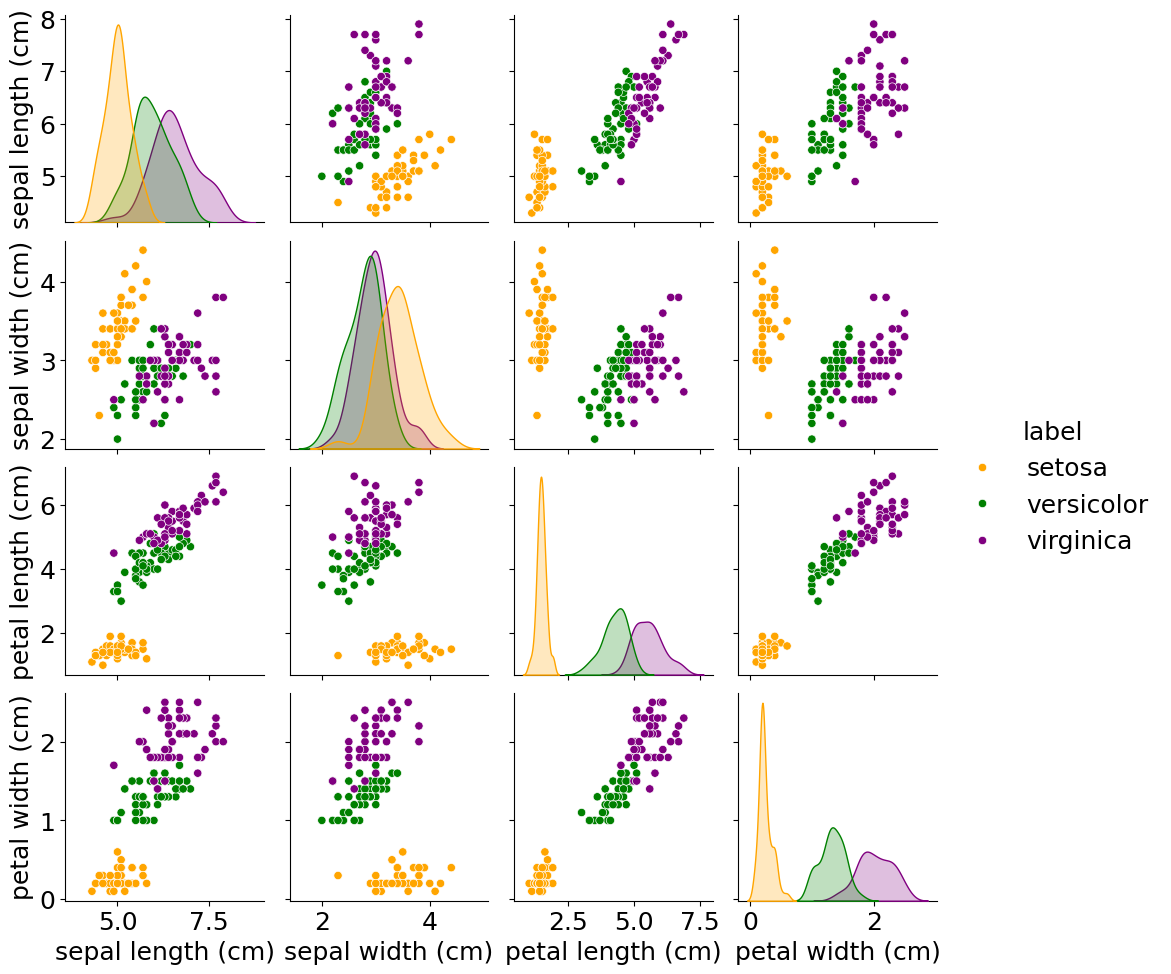

In [3]:

# we pick a color map to match that used by decision tree graphviz
# cmap = ListedColormap(['#fafab0','#a0faa0', '#9898ff']) # orange, green, blue/purple
# cmap = ListedColormap(['orange', 'green', 'purple'])
palette = {"setosa": "orange", "versicolor": "green", "virginica": "purple"}

g = sns.pairplot(df, vars=df.columns[0:4], hue="label", palette=palette)
# g = sns.pairplot(df, vars = df.columns[0:4], hue="label")
plt.savefig("iris_scatterplot_v2.pdf")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.target_names)
print(iris.feature_names)

# ndx = [0, 2] # sepal length, petal length
ndx = [2, 3]  # petal lenght and width
X = iris.data[:, ndx]
y = iris.target
xnames = [iris.feature_names[i] for i in ndx]
ynames = iris.target_names

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
def plot_surface(clf, X, y, xnames, ynames):
    n_classes = 3
    plot_step = 0.02
    markers = ["o", "s", "^"]

    plt.figure(figsize=(10, 10))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.xlabel(xnames[0])
    plt.ylabel(xnames[1])

    # we pick a color map to match that used by decision tree graphviz
    cmap = ListedColormap(["orange", "green", "purple"])
    # cmap = ListedColormap(['blue', 'orange', 'green'])
    # cmap = ListedColormap(sns.color_palette())
    plot_colors = [cmap(i) for i in range(4)]

    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    # Plot the training points
    for i, color, marker in zip(range(n_classes), plot_colors, markers):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], label=ynames[i], edgecolor="black", color=color, s=50, cmap=cmap, marker=marker
        )
    plt.legend()

# Depth 2

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

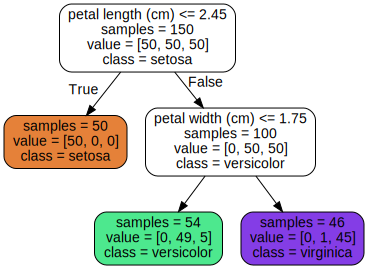

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=xnames,
    class_names=ynames,
    rounded=True,
    impurity=False,
    filled=True,
)

Source.from_file("iris_tree.dot")

In [ ]:
plt.savefig("dtree_iris_depth2_tree_v2.pdf")

<Figure size 432x288 with 0 Axes>

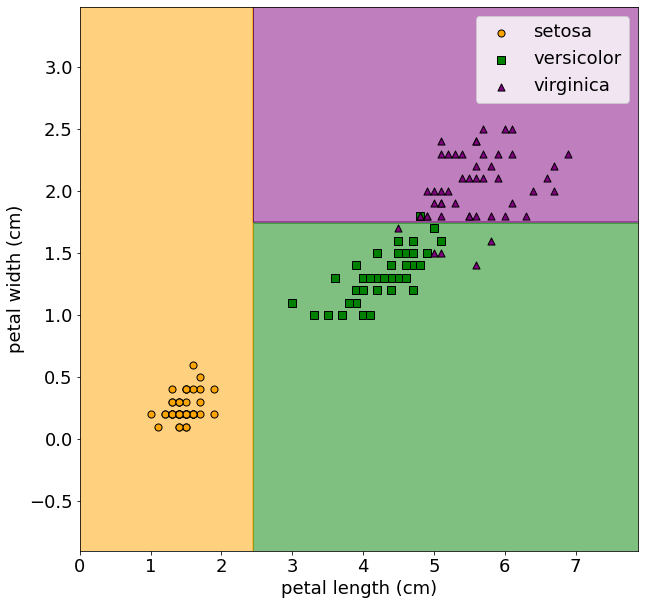

In [ ]:
plot_surface(tree_clf, X, y, xnames, ynames)
plt.savefig("dtree_iris_depth2_surface_v2.pdf")

# Depth 3

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

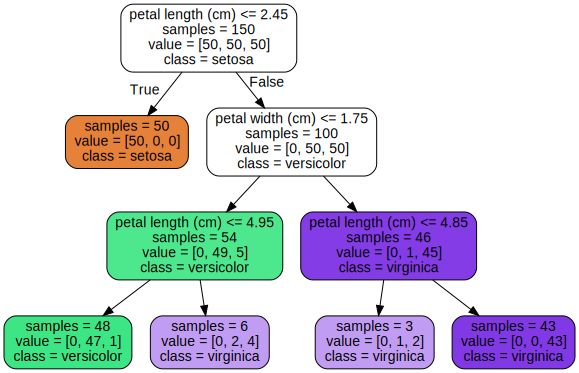

In [ ]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=xnames,
    class_names=ynames,
    rounded=True,
    impurity=False,
    filled=True,
)

Source.from_file("iris_tree.dot")

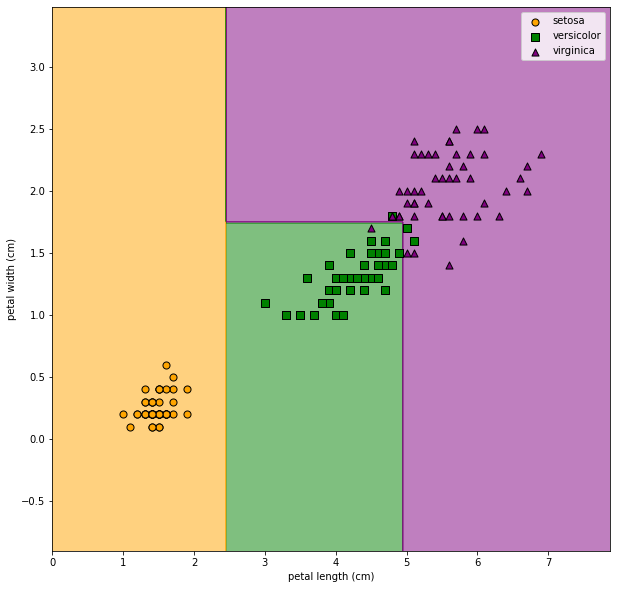

In [ ]:
plot_surface(tree_clf, X, y, xnames, ynames)

# Depth unrestricted

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

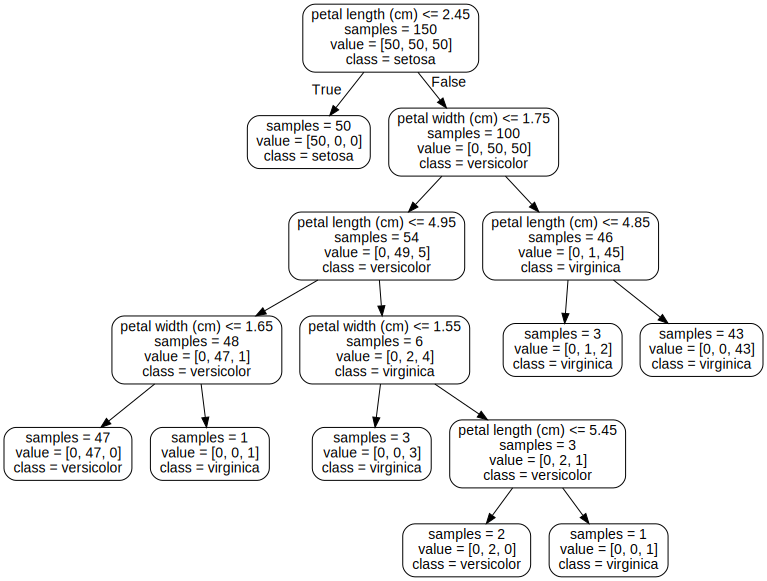

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=xnames,
    class_names=ynames,
    rounded=True,
    filled=False,
    impurity=False,
)

Source.from_file("iris_tree.dot")

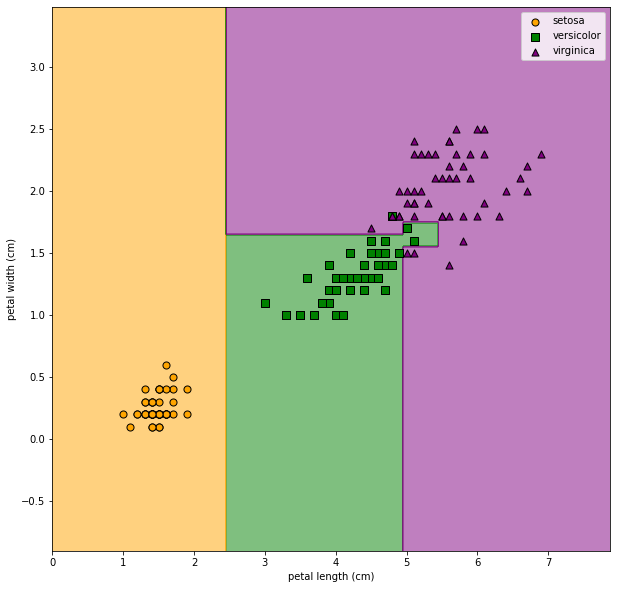

In [ ]:
plot_surface(tree_clf, X, y, xnames, ynames)